In [19]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import LabelEncoder

In [20]:
df = pd.read_csv('../../data/01-modified-data/all_teams_sentiment_df.csv')
df.head()

,Unnamed: 0,Team,0,text,polarity,subjectivity,sentiment,tokenized,nonstop,stemmed
0,0,Ferrari,*female f1 fans reposting shirtless driver pic...,female f fans reposting shirtless driver pics ...,0.04,0.673333,positive,"['female', 'f', 'fans', 'reposting', 'shirtles...","['female', 'f', 'fans', 'reposting', 'shirtles...","['femal', 'f', 'fan', 'repost', 'shirtless', '..."
1,1,Ferrari,Watch a video explaining Ferrari's development...,watch a video explaining ferraris development ...,0.35,0.550000,neutral,"['watch', 'a', 'video', 'explaining', 'ferrari...","['watch', 'video', 'explaining', 'ferraris', '...","['watch', 'video', 'explain', 'ferrari', 'deve..."
2,2,Ferrari,[Race Fans]\nFerrari engine’s driveability is ...,race fans\nferrari engine’s driveability is bi...,0.00,0.000000,neutral,"['race', 'fans', 'ferrari', 'engine', 's', 'dr...","['race', 'fans', 'ferrari', 'engine', 'driveab...","['race', 'fan', 'ferrari', 'engin', 'driveabl'..."
3,3,Ferrari,Ferrari boss Binotto set for talks with Schuma...,ferrari boss binotto set for talks with schuma...,0.00,0.125000,neutral,"['ferrari', 'boss', 'binotto', 'set', 'for', '...","['ferrari', 'boss', 'binotto', 'set', 'talks',...","['ferrari', 'boss', 'binotto', 'set', 'talk', ..."
4,4,Ferrari,Leclerc: F1 world championship drought not pre...,leclerc f world championship drought not press...,0.00,0.000000,positive,"['leclerc', 'f', 'world', 'championship', 'dro...","['leclerc', 'f', 'world', 'championship', 'dro...","['leclerc', 'f', 'world', 'championship', 'dro..."


In [21]:
for i in range(len(df)):
    
    df['text'][i] = df['text'][i].replace(" f ", " f1 ")
    df['text'][i] = df['text'][i].strip("\n")

/var/folders/80/kkd433150p52z36v9dx3c_p00000gn/T/ipykernel_94754/2467898219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = df['text'][i].replace(" f ", " f1 ")
/var/folders/80/kkd433150p52z36v9dx3c_p00000gn/T/ipykernel_94754/2467898219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = df['text'][i].strip("\n")


In [22]:
df1 = df[['Team', 'text']]

[Text(0, 0, 'Williams'),
 Text(1, 0, 'Mclaren'),
 Text(2, 0, 'Mercedes'),
 Text(3, 0, 'Alpine'),
 Text(4, 0, 'Ferrari'),
 Text(5, 0, 'Haas'),
 Text(6, 0, 'Redbull'),
 Text(7, 0, 'Aston Martin'),
 Text(8, 0, 'Alfa Romeo'),
 Text(9, 0, 'Alpha Tauri')]

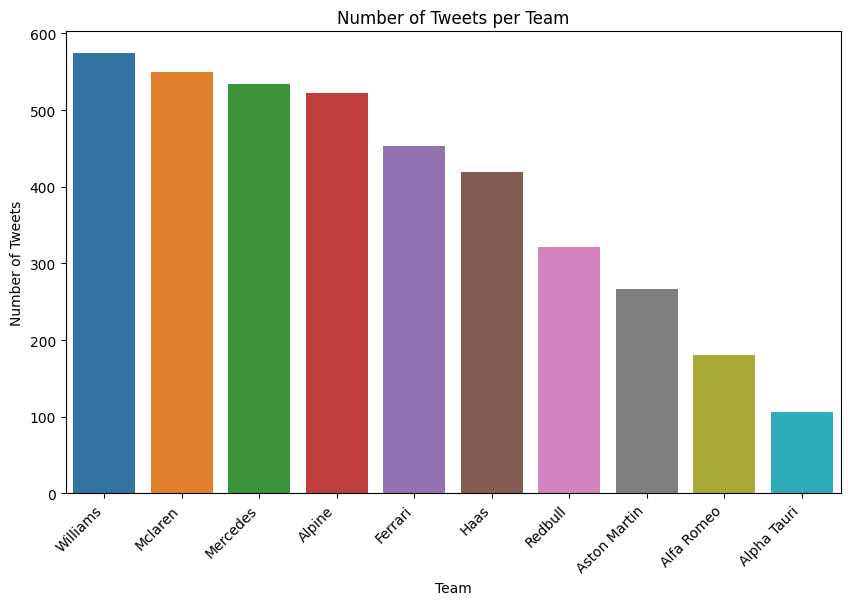

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x = df1['Team'].value_counts().index, y = df1['Team'].value_counts().values, ax=ax)

ax.set_xlabel('Team')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Team')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

In [24]:
X = df1['text']
y = df1['Team']

In [25]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([4, 4, 4, ..., 0, 0, 0])

In [26]:
teams = ['Ferrari', 'Mercedes', 'Redbull', 'Haas', 'Mclaren', 'Alpine', 'Williams', 'Aston Martin', 'Alpha Tauri', 'Alfa Romeo']
y1 = labelencoder.fit(teams)
label_map = dict(zip(y1.classes_, y1.transform(y1.classes_)))
label_list = list(label_map.keys())

In [27]:
import random as rd
MyCV_content=CountVectorizer(input='content',
                        stop_words='english'
                        #max_features=100
                        )

My_DTM2=MyCV_content.fit_transform(X)
ColNames=MyCV_content.get_feature_names()
My_DF_content=pd.DataFrame(My_DTM2.toarray(),columns=ColNames)


My_DF_content['LABEL'] = pd.DataFrame(y,columns=['LABEL'])
rd.seed(1973)
TrainDF, TestDF = train_test_split(My_DF_content, test_size=0.25)
TrainLabels=TrainDF["LABEL"]
TestLabels=TestDF["LABEL"]

TrainDF = TrainDF.drop(["LABEL"], axis=1)
TestDF = TestDF.drop(["LABEL"], axis=1)

from collections import Counter
Counter(y).keys()
Counter(y).values()

/Users/rd/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


dict_values([453, 534, 322, 419, 550, 523, 574, 267, 106, 180])

              precision    recall  f1-score   support

           0       0.63      0.59      0.61        32
           1       1.00      0.25      0.40        24
           2       0.53      0.71      0.61       131
           3       0.90      0.82      0.86        66
           4       0.79      0.75      0.77       117
           5       0.61      0.54      0.58       105
           6       0.73      0.79      0.76       150
           7       0.78      0.79      0.78       145
           8       0.79      0.68      0.73        77
           9       0.76      0.74      0.75       135

    accuracy                           0.71       982
   macro avg       0.75      0.67      0.68       982
weighted avg       0.73      0.71      0.71       982



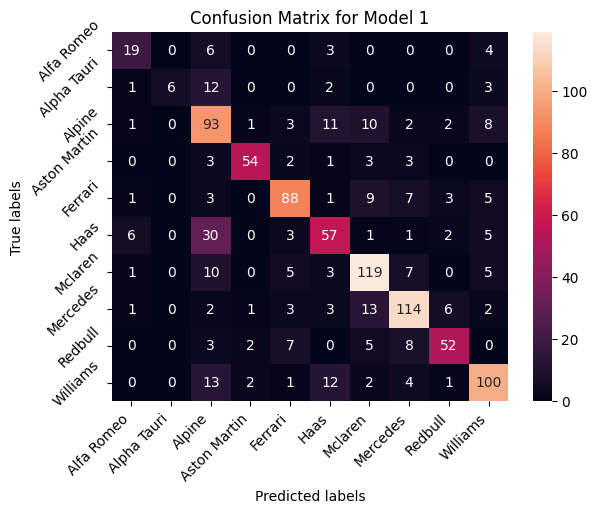

In [28]:
MyModelNB= MultinomialNB(alpha = 1)

NB1=MyModelNB.fit(TrainDF, TrainLabels)
Preds = MyModelNB.predict(TestDF)
Pred_Proba = MyModelNB.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds))
cnf_matrix1 = confusion_matrix(TestLabels, Preds)

##Visualise Confusion Matrix
labels = label_list
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds), annot=True, fmt='g', ax=ax1)

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels');
ax1.set_title('Confusion Matrix for Model 1') 
ax1.xaxis.set_ticklabels(labels)
ax1.yaxis.set_ticklabels(labels)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.74      0.53      0.62        32
           1       1.00      0.25      0.40        24
           2       0.57      0.74      0.64       131
           3       0.91      0.80      0.85        66
           4       0.87      0.76      0.81       117
           5       0.74      0.64      0.69       105
           6       0.75      0.85      0.80       150
           7       0.77      0.81      0.79       145
           8       0.87      0.70      0.78        77
           9       0.74      0.82      0.78       135

    accuracy                           0.75       982
   macro avg       0.80      0.69      0.72       982
weighted avg       0.77      0.75      0.75       982



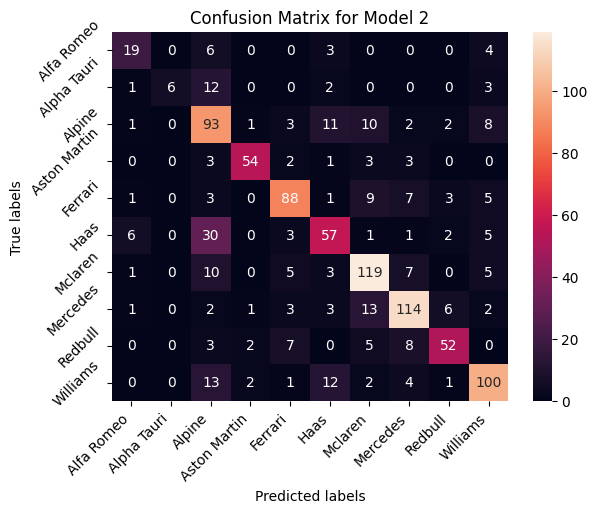

In [29]:
MyModelNB2= MultinomialNB(alpha =5)

NB2=MyModelNB2.fit(TrainDF, TrainLabels)
Preds2 = MyModelNB2.predict(TestDF)
Pred_Proba2 = MyModelNB2.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds2))
cnf_matrix1 = confusion_matrix(TestLabels, Preds2)

##Visualise Confusion Matrix
labels = label_list
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds2), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds), annot=True, fmt='g', ax=ax1)

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels');
ax1.set_title('Confusion Matrix for Model 2') 
ax1.xaxis.set_ticklabels(labels)
ax1.yaxis.set_ticklabels(labels)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.80      0.50      0.62        32
           1       1.00      0.21      0.34        24
           2       0.61      0.79      0.68       131
           3       0.91      0.80      0.85        66
           4       0.90      0.77      0.83       117
           5       0.85      0.67      0.75       105
           6       0.77      0.87      0.82       150
           7       0.76      0.86      0.81       145
           8       0.96      0.69      0.80        77
           9       0.72      0.84      0.77       135

    accuracy                           0.77       982
   macro avg       0.83      0.70      0.73       982
weighted avg       0.79      0.77      0.77       982



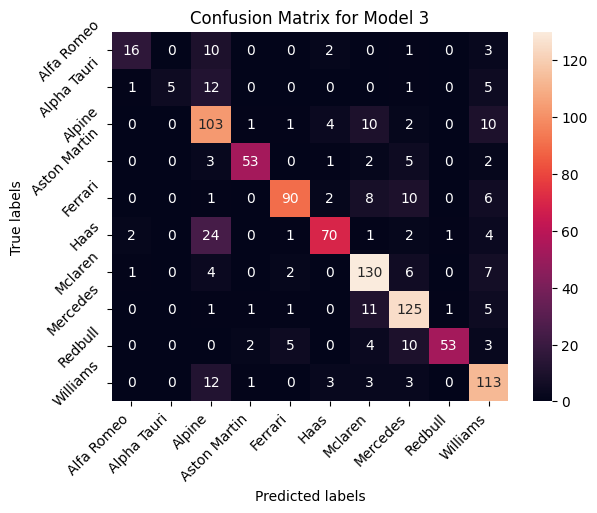

In [30]:
MyModelNB3= MultinomialNB(alpha =10)

NB3=MyModelNB3.fit(TrainDF, TrainLabels)
Preds3 = MyModelNB3.predict(TestDF)
Pred_Proba3 = MyModelNB3.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds3))
cnf_matrix1 = confusion_matrix(TestLabels, Preds3)

##Visualise Confusion Matrix
labels = label_list
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds3), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels');
ax1.set_title('Confusion Matrix for Model 3') 
ax1.xaxis.set_ticklabels(labels)
ax1.yaxis.set_ticklabels(labels)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.show()
plt.close()

In [31]:
class_0_prob_sorted = NB3.feature_log_prob_[0, :].argsort()[::-1]
class_1_prob_sorted = NB3.feature_log_prob_[1, :].argsort()[::-1]
class_2_prob_sorted = NB3.feature_log_prob_[2, :].argsort()[::-1]
class_3_prob_sorted = NB3.feature_log_prob_[3, :].argsort()[::-1]
class_4_prob_sorted = NB3.feature_log_prob_[4, :].argsort()[::-1]
class_5_prob_sorted = NB3.feature_log_prob_[5, :].argsort()[::-1]
class_6_prob_sorted = NB3.feature_log_prob_[6, :].argsort()[::-1]
class_7_prob_sorted = NB3.feature_log_prob_[7, :].argsort()[::-1]
class_8_prob_sorted = NB3.feature_log_prob_[8, :].argsort()[::-1]
class_9_prob_sorted = NB3.feature_log_prob_[9, :].argsort()[::-1]

print(np.take(MyCV_content.get_feature_names(), class_0_prob_sorted[:20]))
word_cloud_0 = Counter(np.take(MyCV_content.get_feature_names(), class_0_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_1_prob_sorted[:20])) 
word_cloud_1 = Counter(np.take(MyCV_content.get_feature_names(), class_1_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_2_prob_sorted[:20]))
word_cloud_2 = Counter(np.take(MyCV_content.get_feature_names(), class_2_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_3_prob_sorted[:20])) 
word_cloud_3 = Counter(np.take(MyCV_content.get_feature_names(), class_3_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_4_prob_sorted[:20]))
word_cloud_4 = Counter(np.take(MyCV_content.get_feature_names(), class_4_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_5_prob_sorted[:20])) 
word_cloud_5 = Counter(np.take(MyCV_content.get_feature_names(), class_5_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_6_prob_sorted[:20]))
word_cloud_6 = Counter(np.take(MyCV_content.get_feature_names(), class_6_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_7_prob_sorted[:20])) 
word_cloud_7 = Counter(np.take(MyCV_content.get_feature_names(), class_7_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_8_prob_sorted[:20]))
word_cloud_8 = Counter(np.take(MyCV_content.get_feature_names(), class_8_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_9_prob_sorted[:20])) 
word_cloud_9 = Counter(np.take(MyCV_content.get_feature_names(), class_9_prob_sorted[:20]))

['alfa' 'romeo' 'f1' 'zhou' 'haas' 'team' 'formula' 'alpine' 'williams'
 'motorsport' 'future' 'vries' 'ceo' 'hurry' 'sauber' 'gasly' 'fnews'
 'decide' 'says' 'seat']
['tauri' 'alpha' 'f1' 'tsunoda' 'yuki' 'gasly' 'williams' 'alpine' 'vries'
 'team' 'year' 'alphataurif' 'season' 'nyck' 'haas' 'remain' 'yukitsunoda'
 'seat' 'ricciardo' 'driver']
['alpine' 'f1' 'williams' 'gasly' 'haas' 'vries' 'ricciardo' 'alfa'
 'formula' 'driver' 'alonso' 'team' 'schumacher' 'mick' 'seat' 'zhou'
 'romeo' 'piastri' 'alpha' 'pierre']
['aston' 'martin' 'f1' 'bull' 'team' 'red' 'fallows' 'formula' 'car' 'new'
 'astonmartinf' 'young' 'similar' 'reminds' 'dan' 'alonso' 'early'
 'season' 'astonmartin' 'days']
['ferrari' 'f1' 'race' 'team' 'car' 'leclerc' 'schumacher' 'formula'
 'scuderiaferrari' 'th' 'gp' 'like' 'amp' 'season' 'pit' 'fan' 'mercedes'
 'red' 'just' 'racing']
['haas' 'f1' 'williams' 'mick' 'alpine' 'schumacher' 'team' 'alfa' 'vries'
 'seat' 'ricciardo' 'zhou' 'formula' 'driver' 'steiner' 'gasly

/Users/rd/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
label_map

{'Alfa Romeo': 0,
 'Alpha Tauri': 1,
 'Alpine': 2,
 'Aston Martin': 3,
 'Ferrari': 4,
 'Haas': 5,
 'Mclaren': 6,
 'Mercedes': 7,
 'Redbull': 8,
 'Williams': 9}

WordCloud for: Alfa Romeo
WordCloud for: Alpha Tauri
WordCloud for: Alpine
WordCloud for: Aston Martin
WordCloud for: Ferrari
WordCloud for: Haas
WordCloud for: Mclaren
WordCloud for: Mercedes
WordCloud for: Redbull
WordCloud for: Williams


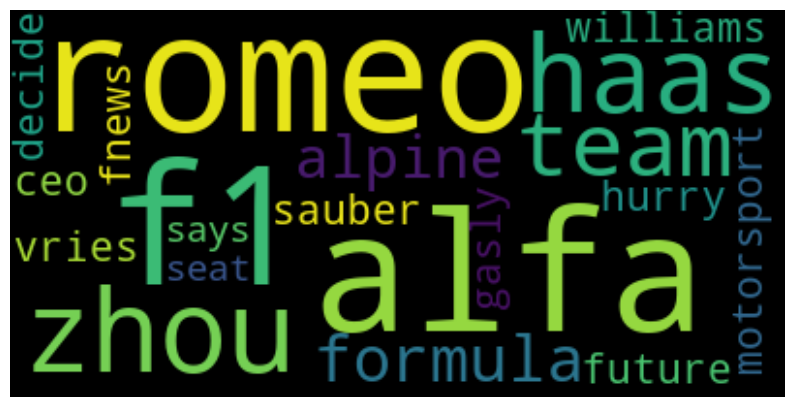

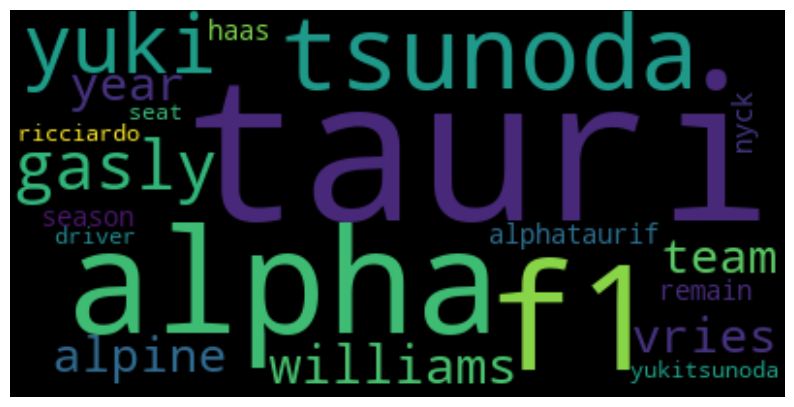

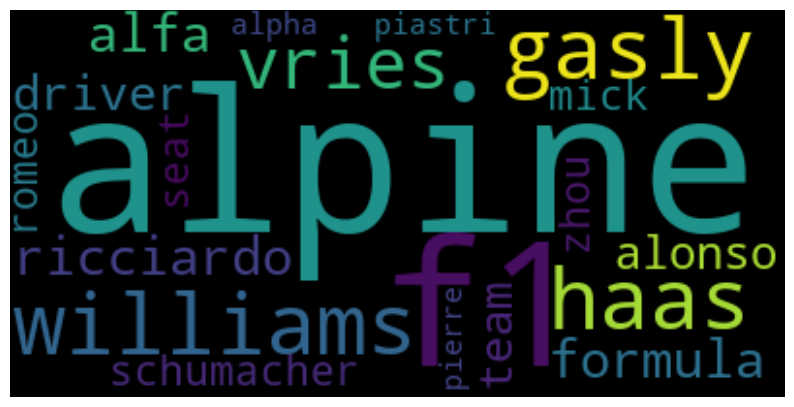

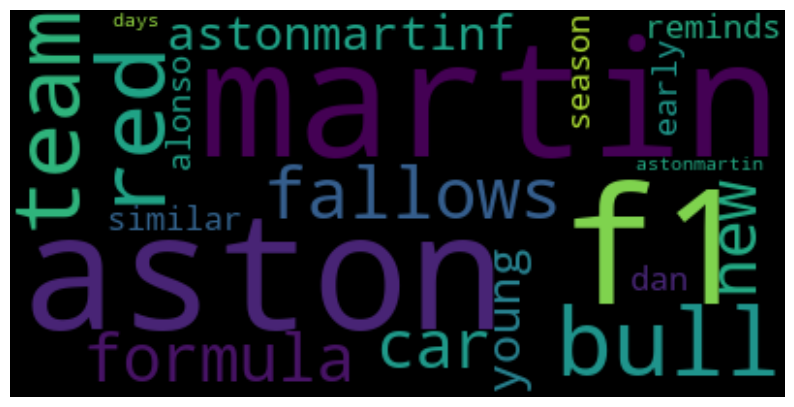

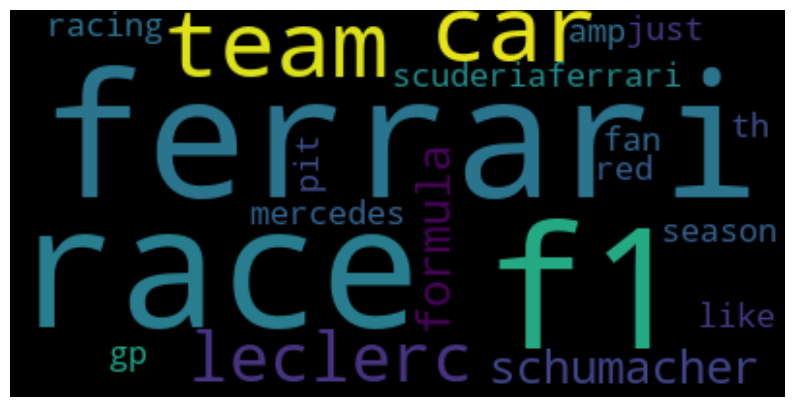

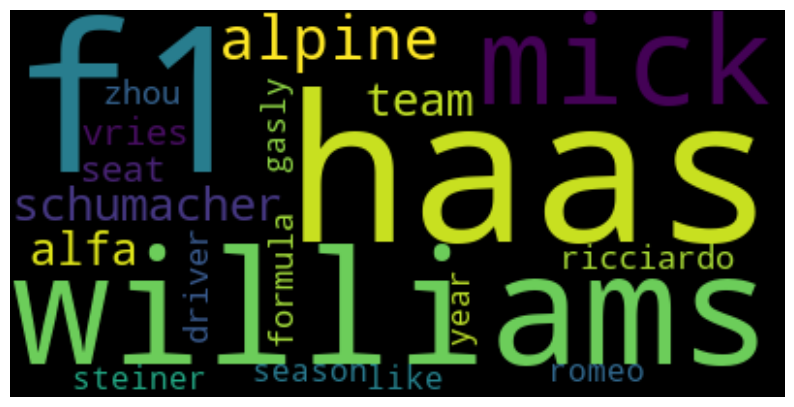

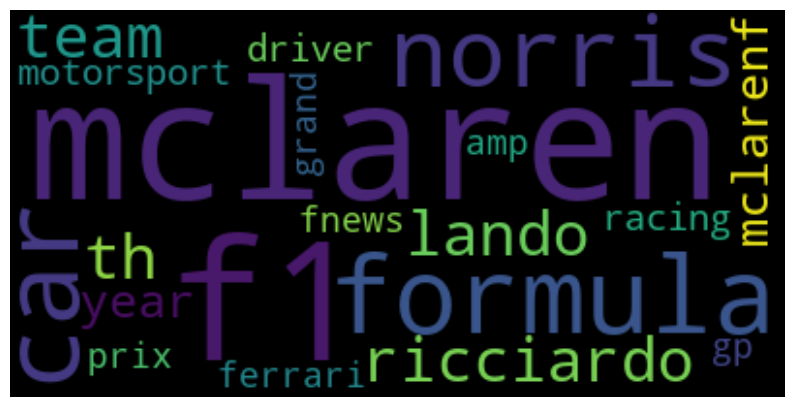

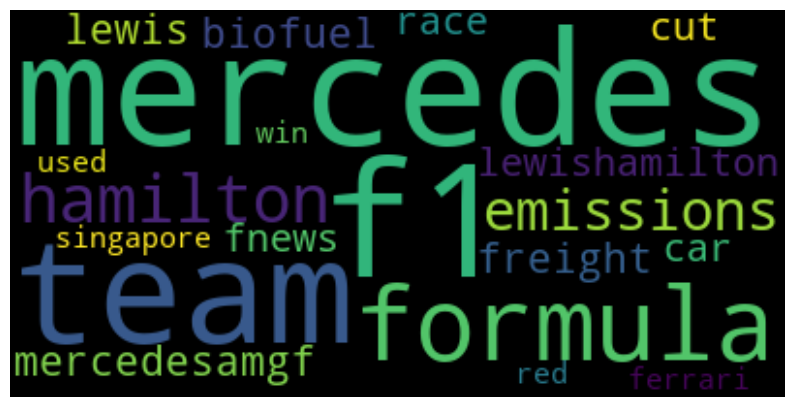

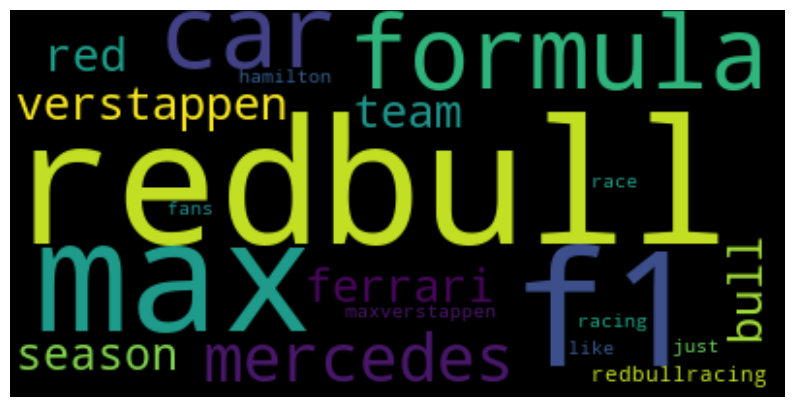

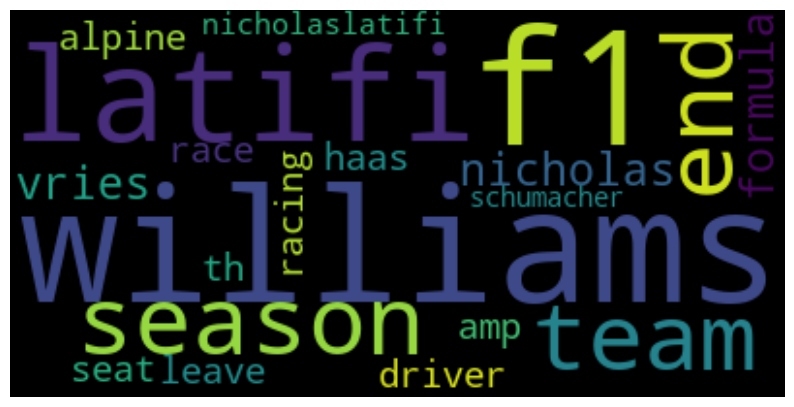

In [33]:
print('WordCloud for:', label_list[0])
wordcloud = WordCloud(background_color='black').fit_words(word_cloud_0)
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

print('WordCloud for:', label_list[1])
wordcloud = WordCloud(background_color='black').fit_words(word_cloud_1)
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

print('WordCloud for:', label_list[2])
wordcloud = WordCloud(background_color='black').fit_words(word_cloud_2)
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

print('WordCloud for:', label_list[3])
wordcloud = WordCloud(background_color='black').fit_words(word_cloud_3)
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

print('WordCloud for:', label_list[4])
wordcloud = WordCloud(background_color='black').fit_words(word_cloud_4)
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

print('WordCloud for:', label_list[5])
wordcloud = WordCloud(background_color='black').fit_words(word_cloud_5)
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

print('WordCloud for:', label_list[6])
wordcloud = WordCloud(background_color='black').fit_words(word_cloud_6)
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

print('WordCloud for:', label_list[7])
wordcloud = WordCloud(background_color='black').fit_words(word_cloud_7)
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

print('WordCloud for:', label_list[8])
wordcloud = WordCloud(background_color='black').fit_words(word_cloud_8)
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

print('WordCloud for:', label_list[9])
wordcloud = WordCloud(background_color='black').fit_words(word_cloud_9)
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")